In [1]:
# Importando as bibliotecas utilizadas

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from yellowbrick.classifier import ConfusionMatrix
import os

In [2]:
# Importando a base de dados a ser utilizada

credito = pd.read_csv(r'D:\Lucas\Estudos\Ciência de dados\31.Prática em Python\dados\Credit.csv', sep=',')
print(credito.shape)
credito.head()

(1000, 21)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [3]:
# Formato de matriz

previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values

In [ ]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada coluna categórica
# É necessário criar um objeto para cada atributo categórico, pois na sequência será executado o processo de enconding novamente para o registro do teste
# Se forem utilizados objetos diferentes, o número de atribuído a cada valor poderá ser diferente, o que deixará o teste inconsistente

# Montei um laço onde é identificado quais colunas tem dados não numéricos para serem transformados, e cria um objeto Label Encoder para cada coluna

for i in range(len(previsores[0])):
    if (type(previsores[0][i]) != 'int') and (type(previsores[0][i]) != 'float'):
        globals().__setitem__('labelencoder'+str(i), LabelEncoder())
        previsores[:, i] = globals()['labelencoder'+str(i)].fit_transform(previsores[:, i])
        
previsores

In [5]:
# Divisão da base de dados entre treinamento e teste

X_treinamento, X_teste, Y_treinamento, Y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

In [6]:
# Criação e treinamento do modelo

arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, Y_treinamento)
arvore

DecisionTreeClassifier()

In [7]:
# Exportação da árvore de decisão para o formato .dot, para posterior visualização

cwd = os.getcwd()

os.chdir(r'C:\Users\lucas\Desktop')
export_graphviz(arvore, out_file = 'tree.dot')

os.chdir(cwd)

In [ ]:
# Obtenção das previsões com os valores de teste
previsoes = arvore.predict(X_teste)
previsoes

In [9]:
# Matriz de confusão

confusao = confusion_matrix(Y_teste, previsoes)
confusao

array([[ 44,  42],
       [ 53, 161]], dtype=int64)

In [10]:
# Taxa de acerto

taxa_acerto = accuracy_score(Y_teste, previsoes)
taxa_acerto

0.6833333333333333

In [11]:
# Taxa de erro

taxa_erro = 1 - taxa_acerto
taxa_erro

0.31666666666666665

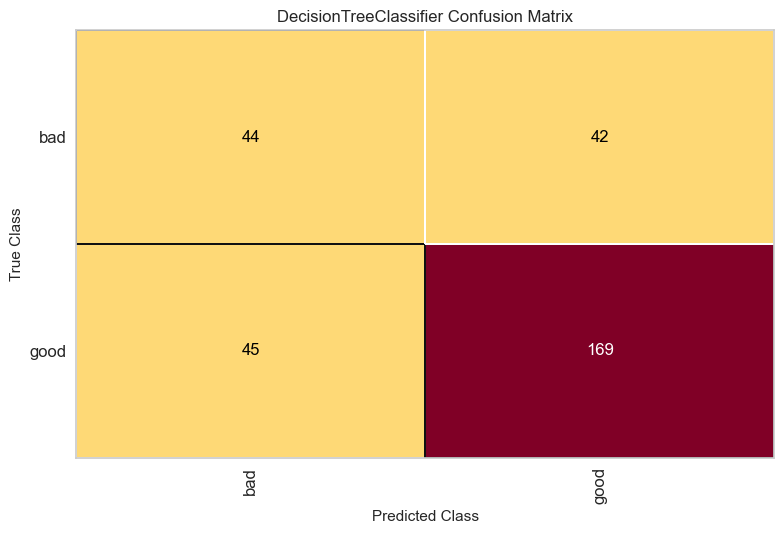

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [13]:
v = ConfusionMatrix(DecisionTreeClassifier())
v.fit(X_treinamento, Y_treinamento)
v.score(X_teste, Y_teste)
v.show()